In [2]:
import pandas as pd
from sklearn.svm import SVC

# Load the Iris dataset
df = pd.read_csv("Iris.csv")

# Handle missing values (if any)
df.dropna(inplace=True)

# Separate features and target variable
X = df.drop("Species", axis=1)
y = df["Species"]

# Normalize the features (if needed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")


# Create and train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_model.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy:.2f}")


Decision Tree Accuracy: 1.00
SVM Accuracy: 1.00


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(


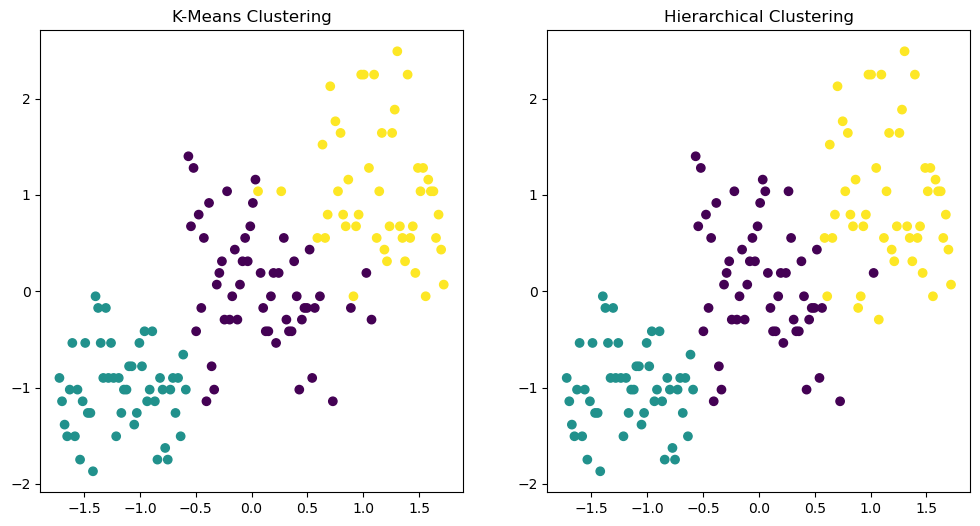

In [4]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans_labels = kmeans.labels_

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering")

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title("Hierarchical Clustering")

plt.show()

In [5]:
import gym
import numpy as np

# Create the CartPole environment
env = gym.make('CartPole-v1')

# Q-Learning Parameters
learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.1
episodes = 1000

# Define the number of buckets for each state variable
buckets = (1, 1, 6, 12)  # Adjust the discretization as needed

# Create a Q-table
action_space = env.action_space.n
state_space = [buckets[i] + 1 for i in range(len(buckets))]
q_table = np.zeros(state_space + [action_space])

# Q-Learning Algorithm
for episode in range(episodes):
    state = env.reset()
    done = False

    while not done:
        # Discretize the state
        state_discrete = tuple(int(state[i] * buckets[i]) for i in range(len(buckets)))

        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state_discrete])

        next_state, reward, done, _ = env.step(action)
        
        # Discretize the next state
        next_state_discrete = tuple(int(next_state[i] * buckets[i]) for i in range(len(buckets)))
        
        q_table[state_discrete + (action,)] = (1 - learning_rate) * q_table[state_discrete + (action,)] + learning_rate * (reward + discount_factor * np.max(q_table[next_state_discrete]))

        state = next_state

env.close()


TypeError: only size-1 arrays can be converted to Python scalars